![Cabec%CC%A7alho_notebook.png](cabecalho_notebook.png)

# PCA - Tarefa 01: *HAR* com PCA

Vamos trabalhar com a base da demonstração feita em aula, mas vamos explorar um pouco melhor como é o desempenho da árvore variando o número de componentes principais.

In [82]:
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

filename_features = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/features.txt"
filename_labels = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/activity_labels.txt"

filename_subtrain = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/train/subject_train.txt"
filename_xtrain = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/train/X_train.txt"
filename_ytrain = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/train/y_train.txt"

filename_subtest = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/test/subject_test.txt"
ffilename_xtest = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/test/X_test.txt"
filename_ytest = "C:/Users/feldb/Documents/EBAC/Tarefas/Modulo 27/Dados/UCI HAR Dataset/test/y_test.txt"

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
labels = pd.read_csv(filename_labels, delim_whitespace=True, header=None, names=['cod_label', 'label'])

subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
X_train = pd.read_csv(filename_xtrain, delim_whitespace=True, header=None, names=features.tolist())
y_train = pd.read_csv(filename_ytrain, header=None, names=['cod_label'])

subject_test = pd.read_csv(filename_subtest, header=None, names=['subject_id'], squeeze=True)
X_test = pd.read_csv(ffilename_xtest, delim_whitespace=True, header=None, names=features.tolist())
y_test = pd.read_csv(filename_ytest, header=None, names=['cod_label'])

C:\Users\feldb\AppData\Local\Temp\ipykernel_18232\652898678.py:29: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\feldb\AppData\Local\Temp\ipykernel_18232\652898678.py:32: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  subject_train = pd.read_csv(filename_subtrain, header=None, names=['subject_id'], squeeze=True)
C:\Users\feldb\AppData\Local\Temp\ipykernel_18232\652898678.py:36: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  features = pd.read_csv(filename_features, header=None, names=['nome_var'], squeeze=True, sep="#")
C:\Users\feldb\AppData\Local\Temp\ipykernel_18232\6

## Árvore de decisão

Rode uma árvore de decisão com todas as variáveis, utilizando o ```ccp_alpha=0.001```. Avalie a acurácia nas bases de treinamento e teste. Avalie o tempo de processamento.

In [83]:
%%time

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=0.001).fit(X_train, y_train)
acc_train = clf.score(X_train, y_train)
acc_teste = clf.score(X_test, y_test)
print(f'Acurácia da melhor árvore na base de treino:    {acc_train*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {acc_teste*100:.1f}')

Acurácia da melhor árvore na base de treino:    97.7
Acurácia da melhor árvore na base de teste: 93.4
Wall time: 2.44 s


## Árvore com PCA

Faça uma análise de componemtes principais das variáveis originais. Utilize apenas uma componente. Faça uma árvore de decisão com esta componente como variável explicativa.

- Avalie a acurácia nas bases de treinamento e teste
- Avalie o tempo de processamento

In [84]:
%%time
prcomp = PCA(n_components=1).fit(X_train)

pc_train = prcomp.transform(X_train)
pc_test  = prcomp.transform(X_test)

Wall time: 103 ms


In [85]:
%%time
clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)

Wall time: 1.78 s


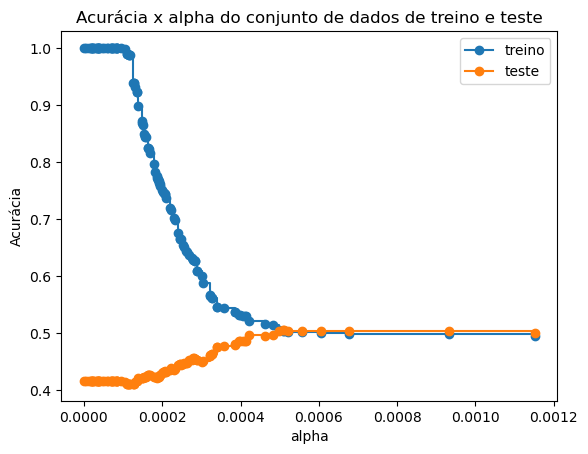

Wall time: 291 ms


In [86]:
%%time
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], test_scores[:nx], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

In [67]:
ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino: {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {test_scores[ind_melhor_arvore]*100:.1f}')


Acurácia da melhor árvore na base de treino: 49.6
Acurácia da melhor árvore na base de teste: 51.7


## Testando o número de componentes

Com base no código acima, teste a árvore de classificação com pelo menos as seguintes possibilidades de quantidades de componentes: ```[1, 2, 5, 10, 50]```. Avalie para cada uma delas:

- Acurácia nas bases de treino e teste
- Tempo de processamento


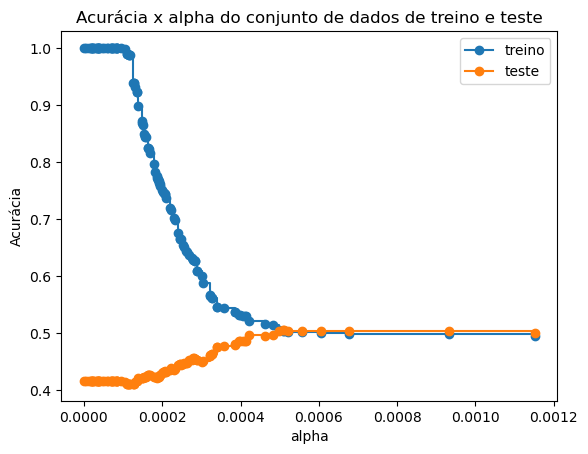

Acurácia da melhor árvore na base de treino:    50.3
Acurácia da melhor árvore na base de teste: 50.5
Wall time: 2.18 s


In [90]:
%%time

prcomp = PCA(n_components=1).fit(X_train)

pc_train = prcomp.transform(X_train)
pc_test  = prcomp.transform(X_test)

clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], test_scores[:nx], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {test_scores[ind_melhor_arvore]*100:.1f}')

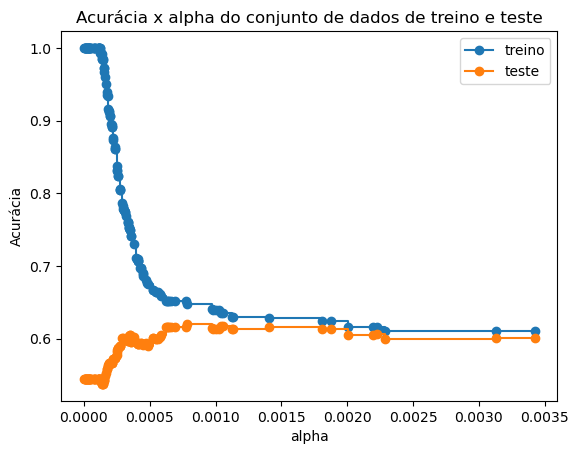

Acurácia da melhor árvore na base de treino:    64.7
Acurácia da melhor árvore na base de teste: 62.0
Wall time: 2.43 s


In [91]:
%%time

prcomp = PCA(n_components=2).fit(X_train)

pc_train = prcomp.transform(X_train)
pc_test  = prcomp.transform(X_test)

clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], test_scores[:nx], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {test_scores[ind_melhor_arvore]*100:.1f}')


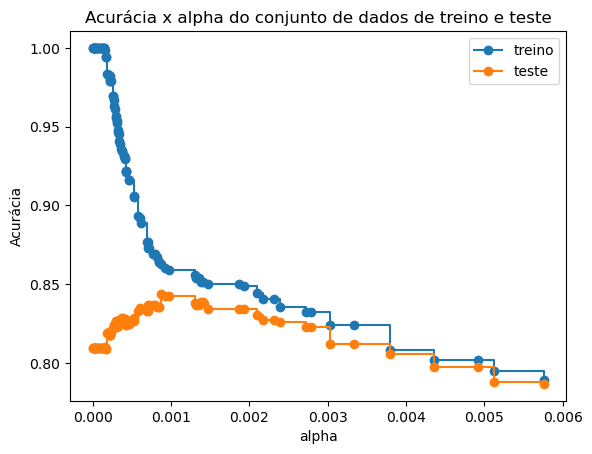

Acurácia da melhor árvore na base de treino:    86.3
Acurácia da melhor árvore na base de teste: 84.4
Wall time: 2.65 s


In [92]:
%%time

prcomp = PCA(n_components=5).fit(X_train)

pc_train = prcomp.transform(X_train)
pc_test  = prcomp.transform(X_test)

clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], test_scores[:nx], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {test_scores[ind_melhor_arvore]*100:.1f}')

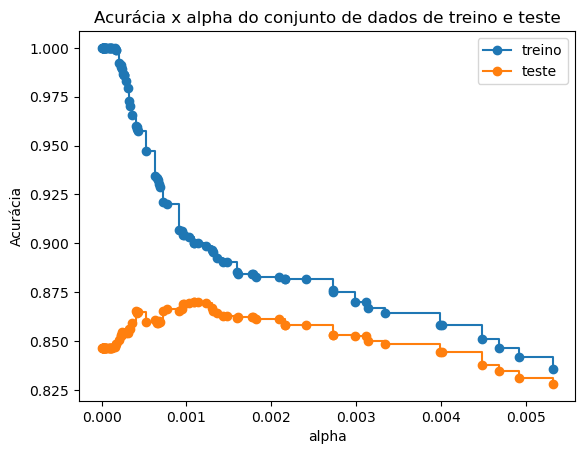

Acurácia da melhor árvore na base de treino:    90.0
Acurácia da melhor árvore na base de teste: 87.0
Wall time: 4.45 s


In [93]:
%%time

prcomp = PCA(n_components=10).fit(X_train)

pc_train = prcomp.transform(X_train)
pc_test  = prcomp.transform(X_test)

clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], test_scores[:nx], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {test_scores[ind_melhor_arvore]*100:.1f}')

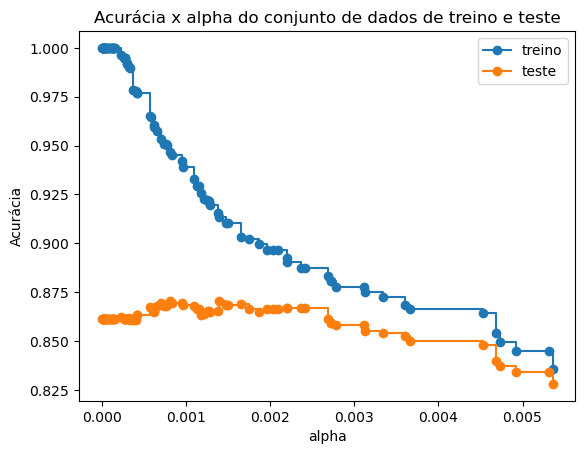

Acurácia da melhor árvore na base de treino:    91.3
Acurácia da melhor árvore na base de teste: 87.1
Wall time: 21.4 s


In [94]:
%%time

prcomp = PCA(n_components=50).fit(X_train)

pc_train = prcomp.transform(X_train)
pc_test  = prcomp.transform(X_test)

clf = DecisionTreeClassifier(random_state=1234).fit(pc_train, y_train)

caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(pc_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=ccp_alpha).fit(pc_train, y_train)
    clfs.append(clf)
    
train_scores = [clf.score(pc_train, y_train) for clf in clfs]
test_scores = [clf.score(pc_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("Acurácia")
ax.set_title("Acurácia x alpha do conjunto de dados de treino e teste")
nx=-10
ax.plot(ccp_alphas[:nx], train_scores[:nx], marker='o', label="treino",    drawstyle="steps-post")
ax.plot(ccp_alphas[:nx], test_scores[:nx], marker='o', label="teste", drawstyle="steps-post")

ax.legend()
plt.show()

ind_melhor_arvore = len(test_scores) - test_scores[::-1].index(max(test_scores)) - 1
melhor_arvore = clfs[ind_melhor_arvore]

print(f'Acurácia da melhor árvore na base de treino:    {train_scores[ind_melhor_arvore]*100:.1f}')
print(f'Acurácia da melhor árvore na base de teste: {test_scores[ind_melhor_arvore]*100:.1f}')

## Conclua

- O que aconteceu com a acurácia?
- O que aconteceu com o tempo de processamento?

n = 1

Acurácia da melhor árvore na base de treino:    50.3

Acurácia da melhor árvore na base de teste: 50.5

Wall time: 2.18 s
    
n = 2

Acurácia da melhor árvore na base de treino:    64.7

Acurácia da melhor árvore na base de teste: 62.0

Wall time: 2.46 s    
    
n = 5

Acurácia da melhor árvore na base de treino:    86.3

Acurácia da melhor árvore na base de teste: 84.4

Wall time: 2.65 s
    
n = 10

Acurácia da melhor árvore na base de treino:    90.0

Acurácia da melhor árvore na base de teste: 87.0

Wall time: 4.45 s  
    
n = 50   

Acurácia da melhor árvore na base de treino:    91.3

Acurácia da melhor árvore na base de teste: 87.1

Wall time: 21.4 s   


**Até 10 componentes houve aumento substancial da acurácia enquanto o tempo de processamento teve variação quase insignificante.**
    
**Com 50 componentes o aumento da acurácia foi insignificante, porém, o tempo de processamento aumentou consideravelmente.**